<a href="https://colab.research.google.com/github/DJCordhose/ai/blob/master/notebooks/tf2/nn-reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tf-nightly-gpu-2.0-preview

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0-dev20190501


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [4]:
!curl -O https://raw.githubusercontent.com/DJCordhose/deep-learning-crash-course-notebooks/master/data/insurance-customers-1500.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26783  100 26783    0     0  97392      0 --:--:-- --:--:-- --:--:-- 97392


In [5]:
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')
y = df['group']
df.drop('group', axis='columns', inplace=True)
X = df.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### An experimental approach:
- keep adding regularization to make validation and train scores come closer to each other
- this will come at the cost of train scores going down
- if both values start going down you have gone too far
- each experiment takes some time
- for larger datasets and more complex models some people start by overfitting on a subsample of the data (because it trains much faster)
  - then you can be sure you have an architecture that at least has the capacity to solve the problem
  - then keep adding regularizations
  - eventually try using the complete data
- if you want to use batch normalization place it between raw output of neuron and activation function    

In [7]:
from tensorflow.keras.layers import Dense, Dropout, \
                                    BatchNormalization, Activation

dropout = 0.6
model = keras.Sequential()

# reduce capacity by decreasing number of neurons
model.add(Dense(500, name='hidden1', input_dim=3))
model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Dropout(dropout))

model.add(Dense(500, name='hidden2'))
model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Dropout(dropout))

model.add(Dense(3, name='softmax', activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 500)               2000      
_________________________________________________________________
activation (Activation)      (None, 500)               0         
_________________________________________________________________
hidden2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
softmax (Dense)              (None, 3)                 1503      
Total params: 254,003
Trainable params: 254,003
Non-trainable params: 0
_________________________________________________________________


In [8]:
%%time

# reducing batch size might increase overfitting, 
# but might be necessary to reduce memory requirements 
BATCH_SIZE=1000

# reduce this based on what you see in the training history
EPOCHS = 10000

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=0)

CPU times: user 1min 15s, sys: 9.02 s, total: 1min 24s
Wall time: 1min 8s


In [9]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE)
train_accuracy

1200/1200 [==============================] - 0s 36us/sample - loss: 0.6273 - accuracy: 0.8767


0.87666667

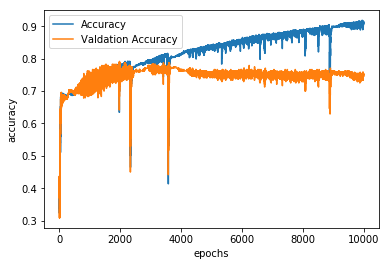

In [10]:
# plt.yscale('log')
plt.ylabel("accuracy")
plt.xlabel("epochs")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(["Accuracy", "Valdation Accuracy"])

In [11]:
model.predict(np.array([[100, 47, 10]]))

array([[0.00141833, 0.9893777 , 0.00920391]], dtype=float32)

In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
test_accuracy

300/300 [==============================] - 0s 69us/sample - loss: 1.3574 - accuracy: 0.7100


0.71